In [1]:
import corneto as cnt
import numpy as np

cnt.info()

CORNETO v0.9.1-alpha.0 (up to date)
Available backends:  CVXPY v1.3.0, PICOS v2.4.1
Default backend (corneto.K): CVXPY
Available solvers for CVXPY: CBC, CPLEX, CVXOPT, ECOS, ECOS_BB, GLPK, GLPK_MI, GUROBI, MOSEK, OSQP, SCIP, SCIPY, SCS
https://github.com/saezlab/corneto


In [2]:
G = cnt.Graph.from_sif_tuples(
    [
        ('v1', 1, 'v2'),
        ('v1', -1, 'v7'),
        ('v1', -1, 'v3'),
        ('v2', -1, 'v4'),
        ('v4', 1, 'v6'),
        ('v4', 1, 'v7'),
        ('v5', -1, 'v6'),
        ('v6', 1, 'v7'),
        ('v7', 1, 'v2'),
        ('v2', 1, 'v5'),
        ('v3', 1, 'v6'),
        ('v2', 1, 'v3')
    ]
)
G.num_edges, G.num_vertices

(12, 7)

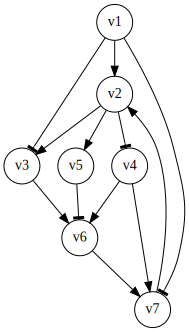

In [3]:
G.plot()

In [4]:
data = {
    'c1': {
        'v1': ('P', -1),
        'v5': ('P',  1),
        'v7': ('M', -1),
        'v3': ('M', 1)
    },
    'c2': {
        'v1': ('P', -1),
        'v4': ('M', 1)
    }
}

In [24]:
from corneto.methods.signflow import signflow, create_flow_graph
Gf = create_flow_graph(G, data)

cp = signflow(
    Gf, 
    data, 
    l0_penalty_edges = 0.1,
    #flow_implies_signal=False,
    #signal_implies_flow=False,
    #use_flow_indicators=False,
    dag=True
)

P = cp.solve(solver='CBC')

for s, o in zip(['c1_loss', 'c2_loss', 'l0_r', 'l0_s'], cp.objectives):
    print(s, o.value)

c1_loss [4.4408921e-16]
c2_loss [2.22044605e-16]
l0_r 17.0


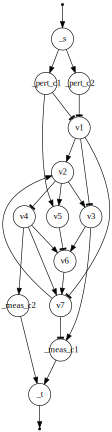

In [25]:
Gf.to_graphviz(graph_attr=dict(size="6"))

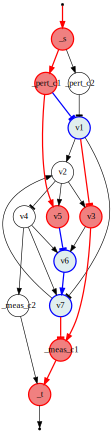

In [26]:
Gf.to_graphviz(problem=cp, condition='c1', graph_attr=dict(size="6"))

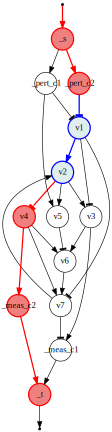

In [27]:
Gf.to_graphviz(problem=cp, condition='c2', graph_attr=dict(size="6"))